# Student Performance Analysis

This project analyzes student academic performance to identify factors that influence
final grades using exploratory data analysis (EDA).

## Problem Statement
Student performance is influenced by multiple academic, behavioral, and family-related
factors. This project aims to analyze student performance data to understand how study
habits, past failures, absences, and family background affect final academic outcomes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/ASUS/Downloads/archive (1)/student-por.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Dataset Overview
The dataset contains student academic records along with demographic, family, and
study-related attributes.

In [9]:
df.shape

(649, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Data Quality Check
The dataset was inspected for missing values to ensure data reliability.

In [10]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values were found in the dataset.

In [13]:
selected_columns = [
    "sex", "age", "studytime", "failures", "schoolsup",
    "paid", "famsup", "Medu", "Fedu", "absences",
    "G1", "G2", "G3"
]

df = df[selected_columns]
df.head()

,sex,age,studytime,failures,schoolsup,paid,famsup,Medu,Fedu,absences,G1,G2,G3
0,F,18,2,0,yes,no,no,4,4,4,0,11,11
1,F,17,2,0,no,no,yes,1,1,2,9,11,11
2,F,15,2,0,yes,no,no,1,1,6,12,13,12
3,F,15,3,0,no,no,yes,4,2,0,14,14,14
4,F,16,2,0,no,no,yes,3,3,0,11,13,13


## Feature Engineering
An average score feature was created to represent overall student performance.

In [14]:
df["average_score"] = df[["G1", "G2", "G3"]].mean(axis=1)

## Exploratory Data Analysis (EDA)

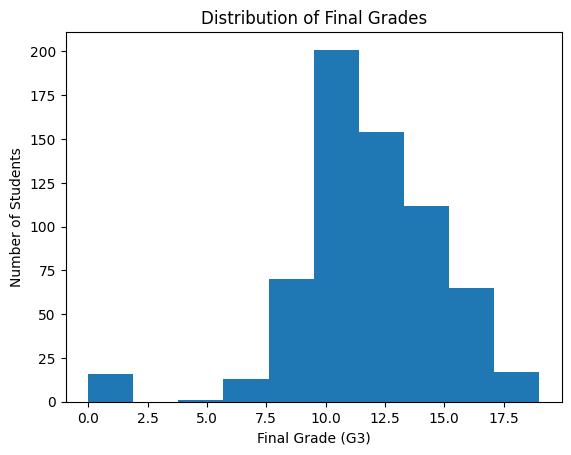

In [16]:
plt.figure()
plt.hist(df["G3"], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()

The distribution shows variability in final grades, indicating differences in student
performance levels.

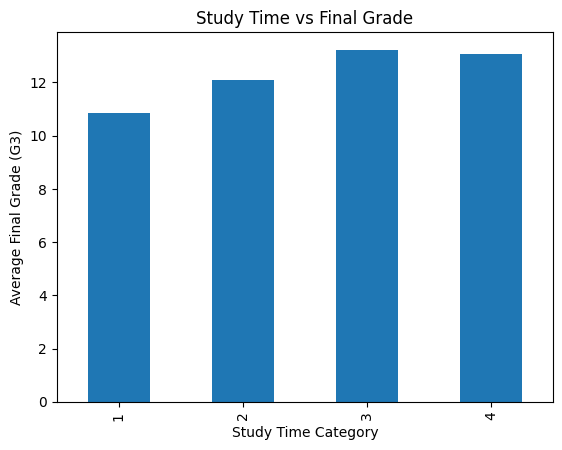

In [17]:
plt.figure()
df.groupby("studytime")["G3"].mean().plot(kind="bar")
plt.xlabel("Study Time Category")
plt.ylabel("Average Final Grade (G3)")
plt.title("Study Time vs Final Grade")
plt.show()

Students with higher study time generally achieved better final grades.

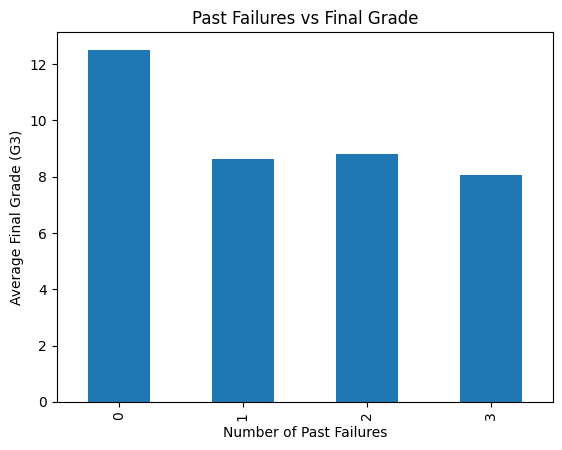

In [18]:
plt.figure()
df.groupby("failures")["G3"].mean().plot(kind="bar")
plt.xlabel("Number of Past Failures")
plt.ylabel("Average Final Grade (G3)")
plt.title("Past Failures vs Final Grade")
plt.show()

An increase in past failures is associated with lower final grades.

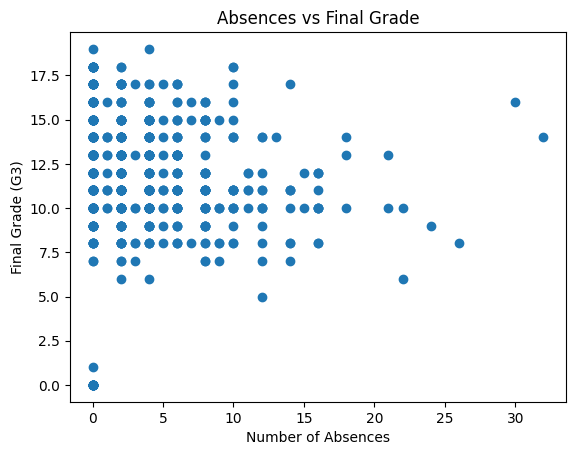

In [19]:
plt.figure()
plt.scatter(df["absences"], df["G3"])
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Absences vs Final Grade")
plt.show()

Higher absenteeism tends to negatively impact student performance.

In [20]:
df[["studytime", "failures", "absences", "average_score"]].corr()

,studytime,failures,absences,average_score
studytime,1.000000,-0.147441,-0.118389,0.261630
failures,-0.147441,1.000000,0.122779,-0.405815
absences,-0.118389,0.122779,1.000000,-0.125015
average_score,0.261630,-0.405815,-0.125015,1.000000


Study time shows a positive relationship with performance, while failures and absences
are negatively associated with academic outcomes.

## Limitations
- The dataset represents a specific academic context
- Analysis is observational and not causal
- Some social factors were excluded for simplicity

## Conclusion
The analysis highlights that student performance is influenced by study habits, past
failures, and absenteeism. Clean and structured data enabled reliable exploratory
analysis, and the findings emphasize the importance of consistent academic engagement.